In [52]:
import pandas as pd
import numpy as np
import math


In [5]:
## Reading mscdonalds csv
data_ff = pd.read_csv("mcdonalds.csv")

In [7]:
data_ff.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
data_ff.shape

(1453, 15)

In [9]:
data_ff.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [29]:
mat = data_ff.iloc[:,0:11]

In [32]:
## Converting categories into Numerical values
mat.replace(('Yes','No'),(1,0),inplace=True)

In [33]:
print(mat)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

In [37]:
print(round(mat.mean(),2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


##### Performing pca 

In [68]:
from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(mat)


In [69]:
print(np.sqrt(pca.explained_variance_))
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [70]:
print(np.ceil(np.sqrt(pca.explained_variance_)),3)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 3


In [71]:
principalComponents.shape

(1453, 11)

###### Creating perpetual graph for pca

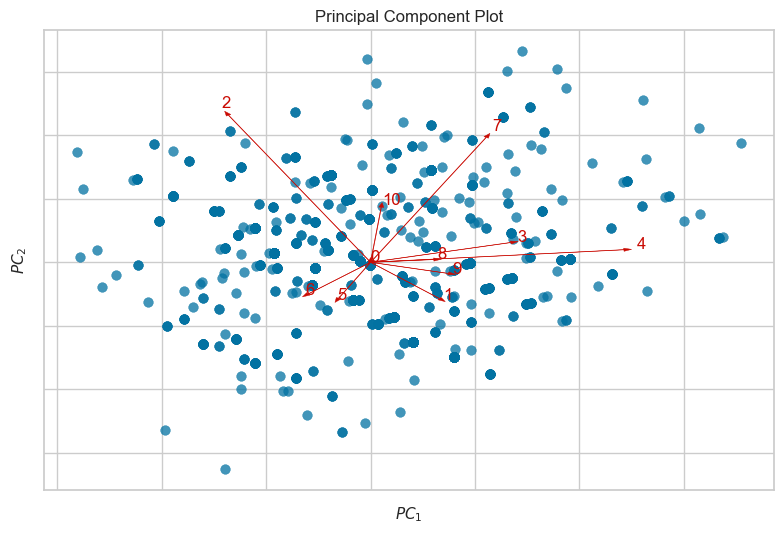

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [112]:
from yellowbrick.features.pca import PCADecomposition
visualizer = PCADecomposition(scale=True, proj_features = True, color = 'PRGn')
y = {0:'yummy', 1:'convenient', 2:'spicy', 3:'fattening', 4:'greasy', 5:'fast', 6:'cheap',
       7:'tasty', 8:'expensive', 9:'healthy', 10:'disgusting'}
visualizer.fit_transform(principalComponents,)
visualizer.show()

### Extracting segments

#### Using K-Means

In [113]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1234,
}

# A list holds the SSE values for each k
sse = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(mat)
    sse.append(kmeans.inertia_)

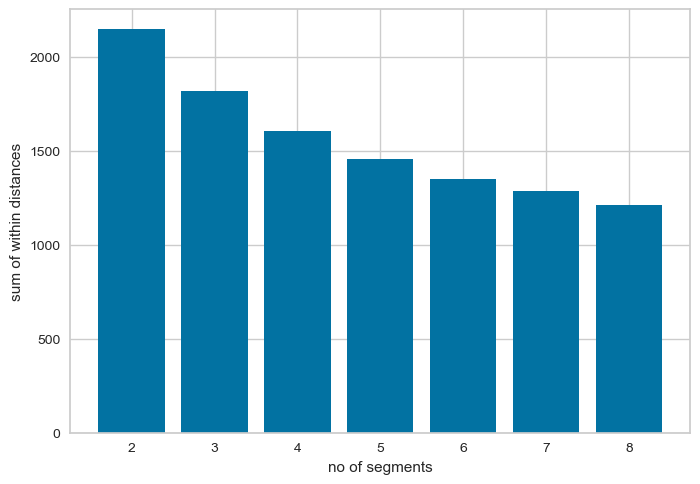

In [114]:
from matplotlib import pyplot as plt
plt.bar(range(2,9),sse)
plt.xlabel('no of segments')
plt.ylabel('sum of within distances')

plt.show()


#### Using Mixtures of Distributions

##### Gaussian mixture models

In [130]:
from sklearn.mixture import GaussianMixture
Gmm = GaussianMixture(n_components=4, random_state=1234)
Gmm.fit(mat)

# Get cluster labels from the GMM model
Gmm_clusters = Gmm.predict(mat)

# Add cluster labels to the original DataFrame
data_ff['GMM_Cluster'] = Gmm_clusters


##### using mixture of regression models

In [132]:
data_ff['Like']

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object

In [159]:
import regex as re
data_ff["Like.n"]= data_ff['Like'].apply(lambda x : int(re.findall(r'-?\d+\.?\d*',x)[0]))


In [180]:
mat['Like']=data_ff["Like.n"]

In [163]:
data_ff["Like.n"].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like.n, dtype: int64

In [181]:
ind_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy','fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
                    
formula = 'Like' + '~' + ' + '.join(ind_vars)

In [164]:
! pip install pymix

     -------------------------------------- 127.4/127.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\cnctk\AppData\Local\Temp\pip-install-_m410x16\pymix_b8b6e66012fa40e5b876b13e87caee44\setup.py", line 11, in <module>
      with open('README.rst') as f:
  FileNotFoundError: [Errno 2] No such file or directory: 'README.rst'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [169]:
# Fitting a finite mixture of linear regression models
k = 2  # Number of clusters
nrep = 10  # Number of random starts
np.random.seed(1234)
kmeans = KMeans(n_clusters=k, n_init=nrep)
mat['Cluster'] = kmeans.fit_predict(mat[ind_vars])


In [171]:
# Summary of cluster sizes
cluster_sizes = mat['Cluster'].value_counts()


In [172]:
cluster_sizes

0    896
1    557
Name: Cluster, dtype: int64

In [175]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [183]:
# Creating and fitting linear regression models for each cluster
models = []
for cluster in range(k):
    subset = mat[mat['Cluster'] == cluster]
    model = smf.ols(formula, data=subset).fit()
    models.append(model)

In [184]:
# Extracting coefficients for each cluster
coefficients = pd.DataFrame()
for cluster, model in enumerate(models):
    coef = model.params.reset_index()
    coef.columns = ['Variable', f'Cluster{cluster+1}']
    coefficients = pd.concat([coefficients, coef.iloc[1:]])  # Exclude Intercept


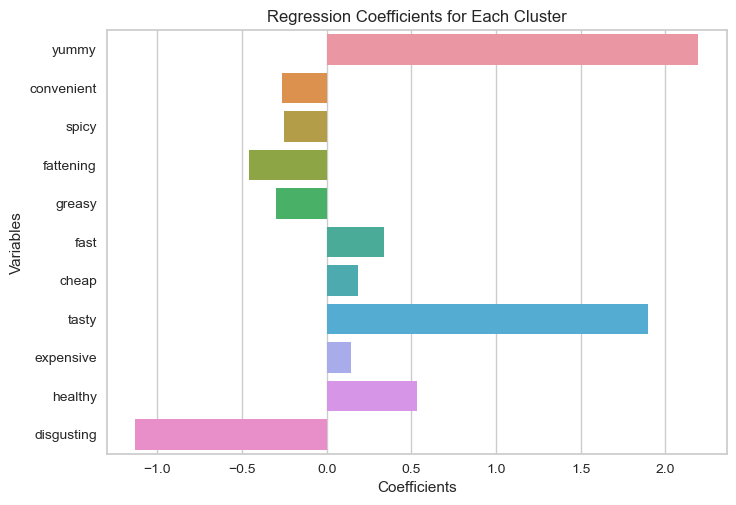

In [186]:
sns.barplot(data=coefficients, x='Cluster1', y='Variable')
plt.title('Regression Coefficients for Each Cluster')
plt.xlabel('Coefficients')
plt.ylabel('Variables')
plt.show()



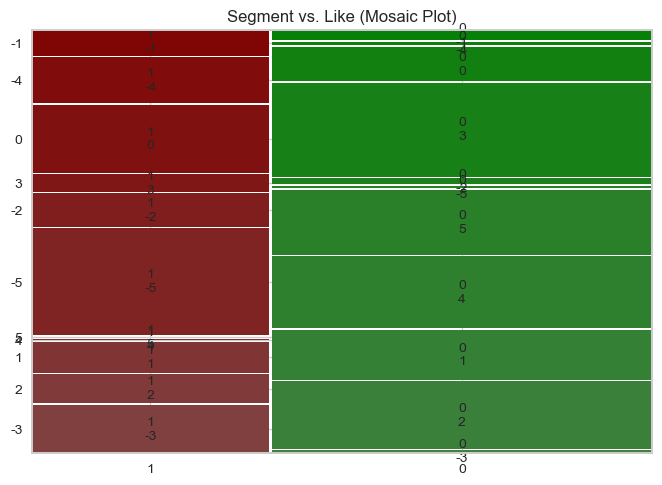

In [190]:
# Mosaic plot for cross-tabulation of segment membership and 'Like' variable
from statsmodels.graphics.mosaicplot import mosaic
mosaic(mat, ['Cluster', 'Like'])
plt.title('Segment vs. Like (Mosaic Plot)')
plt.show()